# Series de tiempo



In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

Algunas veces la teoría clásica de series de tiempo le gana a las redes neuronales, por lo que usualmente lo mejor es aplicar teoría clásica y a los resultados de la teoría clásica aplicarles redes neuronales.

In [2]:
!ls

TimeSeries.ipynb  data	 images  mydata
archive		  faces  models  recommendation_system.ipynb


In [3]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv'); df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv', index_col='Date')

In [5]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
df.index

Index(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
       '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10',
       ...
       '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
       '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30', '1990-12-31'],
      dtype='object', name='Date', length=3650)

Dado que no esta tomando las fechas con un formato de fecha, volvemos a cargar y parseamos por fecha. 

In [7]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv', index_col='Date', parse_dates=True)

In [8]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [9]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [19]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [11]:
# Ahora que ya detecta como fecha el index
# podemos hacer algo como: 

df['1985-01-01': '1986-01-01']
# Que nos da fechas por intervalos

,Temp
Date,
1985-01-01,13.3
1985-01-02,15.2
1985-01-03,13.1
1985-01-04,12.7
1985-01-05,14.6
...,...
1985-12-28,10.8
1985-12-29,12.0
1985-12-30,16.3


# Vizualización en pandas

Lo ideal es que siempre que tienes un nuevo dataset debes explorarlo y entenderlo. Ver el formato de los datos, que significa cada columnas, etc. 

<AxesSubplot:ylabel='Frequency'>

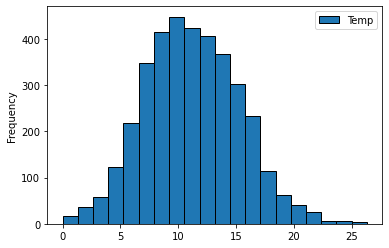

In [16]:
df.plot.hist(edgecolor='k', bins=20)
# Observamos la distribución de las temperaturas
# Parecen tener una distribución normal

<AxesSubplot:xlabel='Date'>

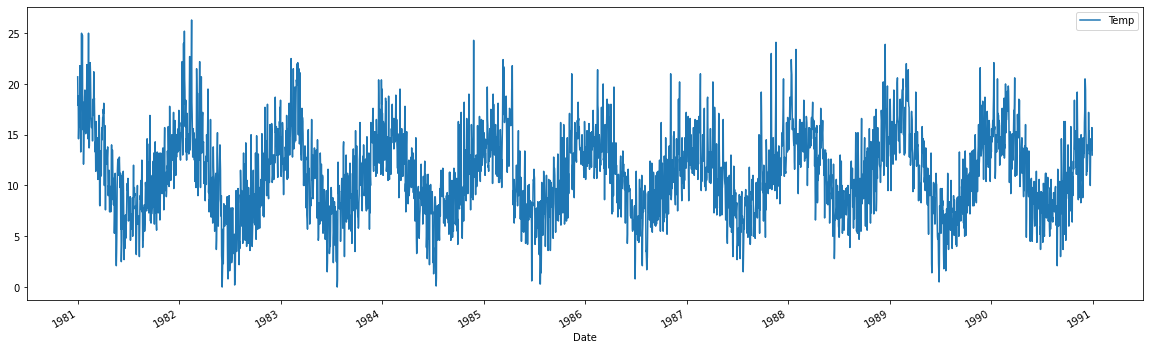

In [13]:
df.plot.line(y='Temp', figsize=(20,6))
# Tiene sentido ver el siguiente patrón 
# dadas las estaciones del año
# invierno baja, verano sube

<AxesSubplot:xlabel='Date'>

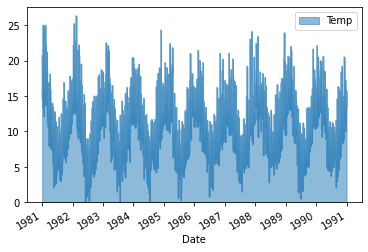

In [14]:
df.plot.area(alpha=0.5)
# Este es similar al anterior sólo que rellena 
# el área de abajo

<AxesSubplot:>

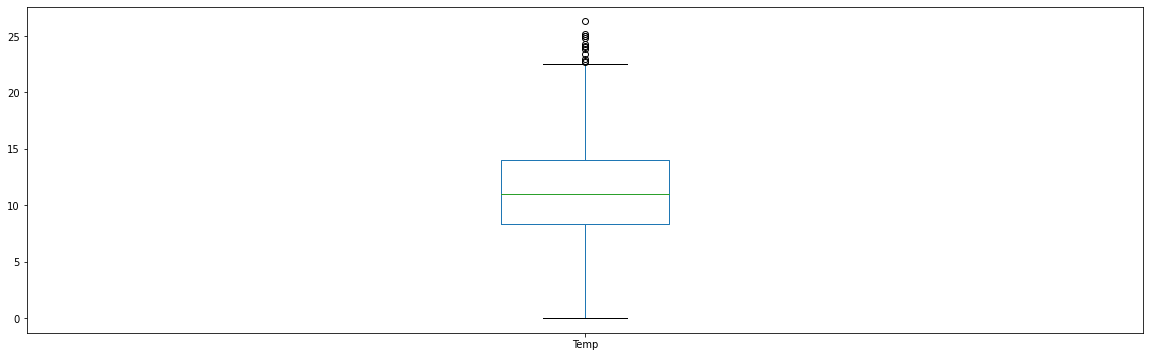

In [17]:
df.plot.box(figsize=(20,6))
# Gráfica de caja, con el máximo y minímo

<AxesSubplot:ylabel='Density'>

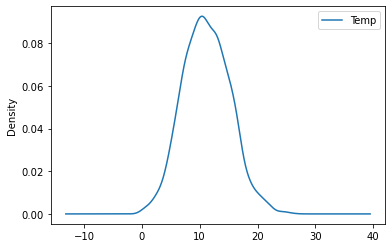

In [18]:
df.plot.kde()

# Agregando columnas

Digamos que ahora queremos añadir la columna "mes"

In [20]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [21]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=3650)

In [22]:
df['Mes'] = df.index.month

In [23]:
df.head()

,Temp,Mes
Date,,
1981-01-01,20.7,1
1981-01-02,17.9,1
1981-01-03,18.8,1
1981-01-04,14.6,1
1981-01-05,15.8,1


In [24]:
# agrupamos por mes
por_mes = df.groupby('Mes').mean()

In [26]:
por_mes.sort_index()

,Temp
Mes,
1,15.030323
2,15.373759
3,14.565484
4,12.088333
5,9.866452
6,7.278333
7,6.692581
8,7.891290
9,8.976333


<AxesSubplot:xlabel='Mes'>

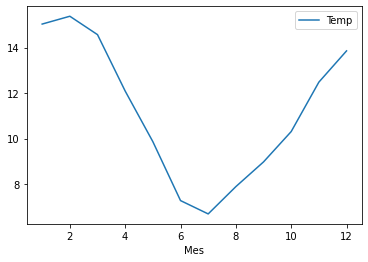

In [28]:
# Si queremos visualizarlo hacemos: 
df.groupby('Mes').mean().plot.line()

In [29]:
df['Año'] = df.index.year

In [30]:
df.head()

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


In [31]:
temp_mensual = df.groupby(['Año', 'Mes']).mean()

<AxesSubplot:xlabel='Año,Mes'>

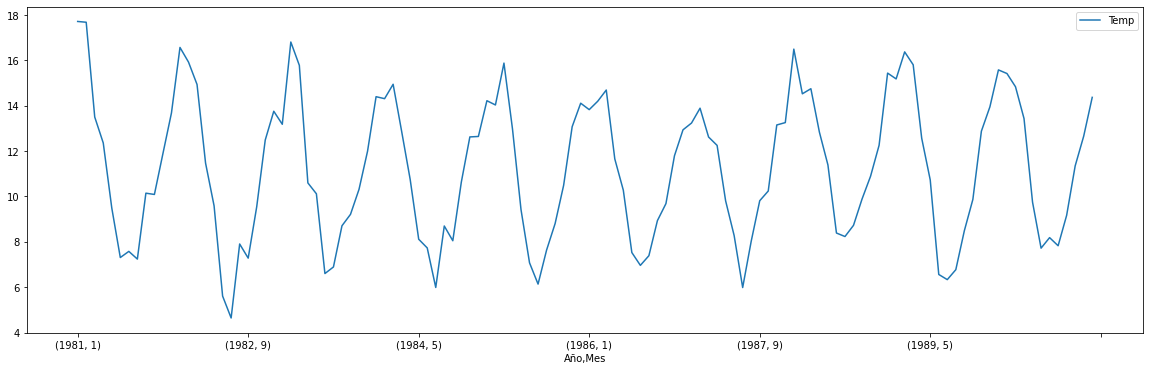

In [33]:
# Si queremos ver la temperatura mensual promedio hacemos:
temp_mensual.plot.line(figsize=(20,6))
# Esta gráfica es similar a la realizada con:
# df.plot.line(y='Temp', figsize=(20,6))
# Pero aquí tenemos menos ruido debido a que 
# estamos usando el promedio

In [34]:
# Si queremos ver la temperatura promedio por año
# hacemos: 
temp_anual = df.groupby(['Año']).mean()

<AxesSubplot:xlabel='Año'>

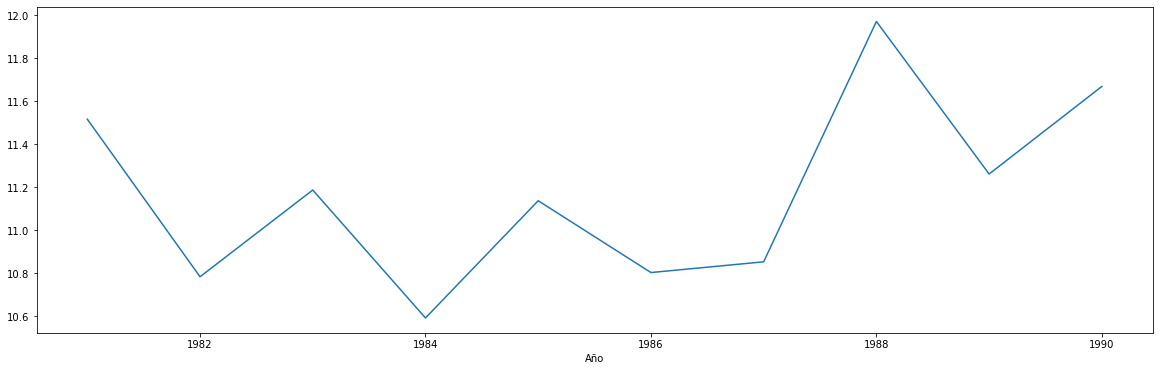

In [36]:
temp_anual['Temp'].plot.line(figsize=(20,6))


* Para categóricas: bar, barh
* Para ver relaciones entre variables: scatter, con s (size) y c (color), alpha, etc.